In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize
from scipy.optimize import approx_fprime
from scipy.optimize import differential_evolution

%matplotlib inline

Задание
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating.

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

In [62]:
# diff strategy
lst = ['rand1bin','best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp',
      'rand2exp', 'randtobest1bin', 'best2bin', 'rand2bin']
x=[]
y=[]
for i in lst:
    result = differential_evolution(ackley, bounds, seed=42, strategy=i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
        

# result = differential_evolution(ackley, bounds, seed=42, strategy='currenttobest1binv')
# print(i,':','\n', result, '\n',)        
       

rand1bin : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5043
     nit: 165
 success: True
       x: array([0., 0.]) 

best1bin : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

best1exp : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4383
     nit: 143
 success: True
       x: array([0., 0.]) 

rand1exp : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7473
     nit: 246
 success: True
       x: array([0., 0.]) 

randtobest1exp : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4833
     nit: 158
 success: True
       x: array([0., 0.]) 

currenttobest1exp : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False

<BarContainer object of 11 artists>

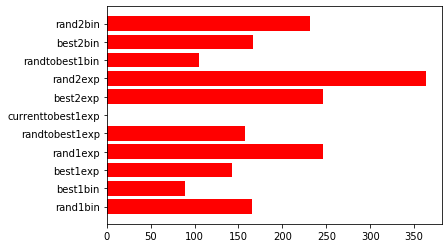

In [45]:
# Наилучший результат из всех алгоритмов как мы видим дает best1bin

fig, ax = plt.subplots()
ax.barh(x, y, color = 'r')

In [63]:
a = range(0, 1000, 100)
x=[]
y=[]
for i in a:
    result = differential_evolution(ackley, 
                                    bounds, 
                                    seed=42, 
                                    strategy='best1bin', 
                                    maxiter= i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
    

0 : 
      fun: 3.5744518772578577
     jac: array([-3.55271368e-07,  4.61852778e-06])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 66
     nit: 0
 success: False
       x: array([ 0.96847764, -0.96847758]) 

100 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

200 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

300 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

400 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

500 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 suc

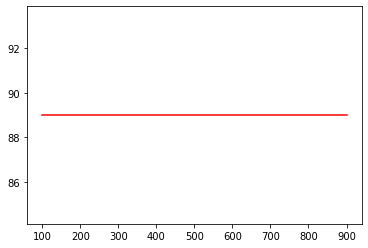

In [22]:
# естественно maxiter не внияет на кол-во итераций пдля поиска минимума, он просто ограничивает ег свеху

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r')

In [61]:
a = range(100)
x=[]
y=[]
for i in a:
    result = differential_evolution(ackley, 
                                    bounds, 
                                    seed=42, 
                                    strategy='best1bin', 
                                    maxiter= 100,
                                    popsize= i)
    print(i,':','\n', result, '\n',)    
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)

    

0 : 
      fun: 2.5799275570299014
     jac: array([-1.06581410e-06, -1.42108547e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-2.25178365e-08,  9.52166523e-01]) 

1 : 
      fun: 2.5799275570299014
     jac: array([-1.06581410e-06, -1.42108547e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-2.25178365e-08,  9.52166523e-01]) 

2 : 
      fun: 2.5799275570299014
     jac: array([-1.06581410e-06, -1.42108547e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-2.25178365e-08,  9.52166523e-01]) 

3 : 
      fun: 1.423228157548806e-08
     jac: array([0.45909481, 0.86828003])
 message: 'Optimization terminated successfully.'
    nfev: 372
     nit: 29
 success: True
       x: array([-4.05152352e-09, -2.98410440e-09]) 

4 : 
      fun: 1.5048638335457554e-08
     jac: array([ 1.43581538, -0.123991

49 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 9569
     nit: 96
 success: True
       x: array([0., 0.]) 

50 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 9963
     nit: 98
 success: True
       x: array([0., 0.]) 

51 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 10059
     nit: 97
 success: True
       x: array([0., 0.]) 

52 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 9943
     nit: 94
 success: True
       x: array([0., 0.]) 

53 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 10769
     nit: 100
 success: False
       x: array([0., 0.]) 

54 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 10971
     nit: 100
 success: False
       x: array([0., 0.]) 

55 : 
      f

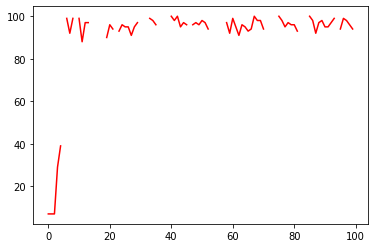

In [48]:
# мы видим в начале рост числа итераций это происходит изза того что решение не является действительно глобальным минимумом
# дальше более менее значение стагнируют с небольшими кколебаниями

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r')

In [60]:
a = [-0.2,  -0.15, -0.1, -0, 0.0001, 0.15, 0.2, 0.3, 0.4, 0.5, 1]
x=[]
y=[]
for i in a:
    result = differential_evolution(ackley, 
                                    bounds, 
                                    seed=42, 
                                    strategy='best1bin', 
                                    maxiter= 100,
                                    popsize= 15, 
                                    tol= i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
    

-0.2 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3093
     nit: 100
 success: False
       x: array([0., 0.]) 

-0.15 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3093
     nit: 100
 success: False
       x: array([0., 0.]) 

-0.1 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3093
     nit: 100
 success: False
       x: array([0., 0.]) 

0 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

0.0001 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

0.15 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0.,

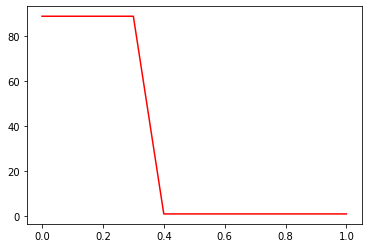

In [53]:
# видим что при отрицательных значениях алгоритм вообще не находит минимум, также как и при положительных больше примерно 0.3

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r')


In [59]:
a = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.2, 1.5, 1.9]
x=[]
y=[]
for i in a:
    result = differential_evolution(ackley, 
                                    bounds,  
                                    seed=42,
                                    strategy='best1bin', 
                                    maxiter= 100,
                                    popsize= 15, 
                                    tol= 0,
                                    mutation= i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
    
    

0 : 
      fun: 3.5744518772578577
     jac: array([-3.55271368e-07,  4.61852778e-06])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3066
     nit: 100
 success: False
       x: array([ 0.96847764, -0.96847758]) 

0.1 : 
      fun: 3.5744518772576765
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3033
     nit: 100
 success: False
       x: array([0.96847766, 0.96847765]) 

0.2 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 933
     nit: 28
 success: True
       x: array([0., 0.]) 

0.3 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1263
     nit: 39
 success: True
       x: array([0., 0.]) 

0.4 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1473
     nit: 46
 success: True
       x: array([0., 0.]) 

0.5 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    

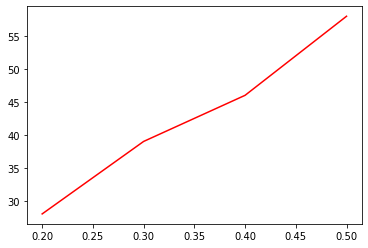

In [55]:
# видим что кол-во итераций возрастает вместе с параметром mutation, минимум достигается при значении 0.2 (в нашем случае)

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r')


In [58]:
a = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.81, 0.9]
x = []
y = []
for i in a:
    result = differential_evolution(ackley, 
                                    bounds,  
                                    seed=42,
                                    strategy='best1bin', 
                                    maxiter= 100,
                                    popsize= 15, 
                                    tol= 0,
                                    mutation= 0.2,
                                    recombination= i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
    

0 : 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3093
     nit: 100
 success: False
       x: array([0., 0.]) 

0.1 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1833
     nit: 58
 success: True
       x: array([0., 0.]) 

0.2 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1593
     nit: 50
 success: True
       x: array([0., 0.]) 

0.3 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1473
     nit: 46
 success: True
       x: array([0., 0.]) 

0.4 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1413
     nit: 44
 success: True
       x: array([0., 0.]) 

0.5 : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1263
     nit: 39
 success: True
       x: array([0., 0.]) 

0.6 : 
      fun: 4.4408

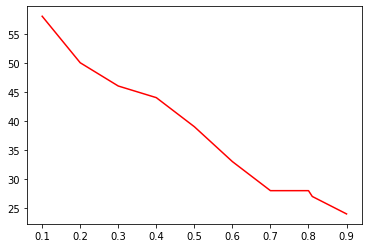

In [57]:
# видим что кол-во итераций убывает вместе с параметром recombination, минимум достигается при значении 0.81 (в нашем случае)
# при параметре 0.9 глобальный минимум уже не находится

fig, ax = plt.subplots()
ax.plot(x, y, color = 'r')

In [64]:
a = ['immediate', 'deferred']
x = []
y = []
for i in a:
    result = differential_evolution(ackley, 
                                    bounds,  
                                    seed=42,
                                    strategy='best1bin', 
                                    maxiter= 100,
                                    popsize= 15, 
                                    tol= 0,
                                    mutation= 0.2,
                                    recombination= 0.81,
                                    updating = i)
    print(i,':','\n', result, '\n',)
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
    

immediate : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 903
     nit: 27
 success: True
       x: array([0., 0.]) 

deferred : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1203
     nit: 37
 success: True
       x: array([0., 0.]) 



<BarContainer object of 2 artists>

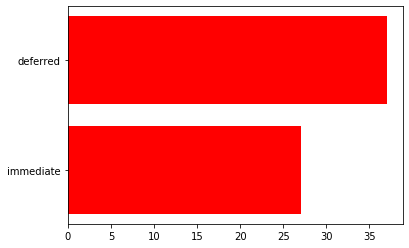

In [68]:
# лцчший результат при парамеетре immediate

fig, ax = plt.subplots()
ax.barh(x, y, color = 'r')

In [69]:
result = differential_evolution(ackley, 
                                bounds, 
                                seed=42)
print('without parametrs',':','\n', result, '\n',)

result = differential_evolution(ackley, 
                                bounds,  
                                seed=42,
                                strategy='best1bin', 
                                maxiter= 100,
                                popsize= 15, 
                                tol= 0,
                                mutation= 0.2,
                                recombination= 0.81,
                                updating = 'immediate')
print('with parametrs',':','\n', result, '\n',)

without parametrs : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.]) 

with parametrs : 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 903
     nit: 27
 success: True
       x: array([0., 0.]) 



Постройте графики количества итераций оптимизации функции ackley от значения параметра.

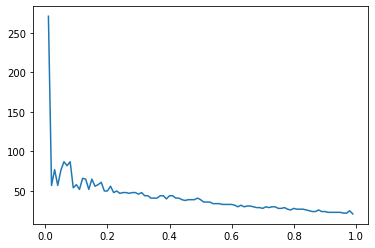

In [70]:
a = np.arange(0, 1, 0.01)
x=[]
y=[]
for i in a:
    result = differential_evolution(ackley, 
                                    bounds,  
                                    seed=42,
                                    strategy='best1bin',  
                                    mutation= 0.2,
                                    recombination= i,
                                    updating = 'immediate')
    if result.success:
        x.append(i)
        y.append(result.nit)
    else:
        x.append(i)
        y.append(np.inf)
plt.plot(x,y)
plt.show()

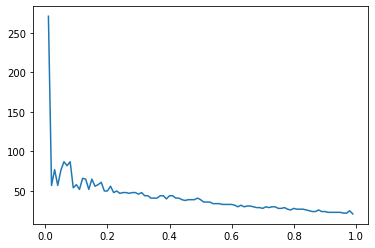

In [71]:
plt.plot(x,y)
plt.show()